In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [107]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
cd "/content/drive/My Drive/Colab Notebooks/Time_Series_Projects/Data"

/content/drive/My Drive/Colab Notebooks/Time_Series_Projects/Data


In [6]:
df = pd.read_csv('Alcohol_Sales.csv',index_col=0,parse_dates=True)
df.index.freq = 'MS'

In [7]:
df.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [8]:
df.columns = ['Sales']

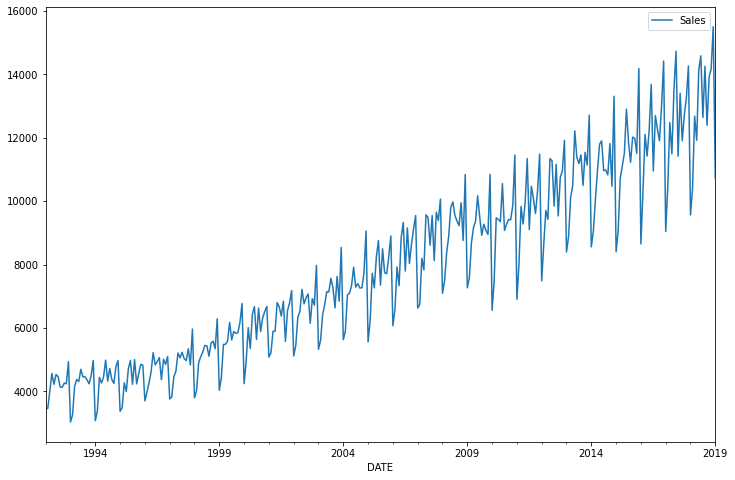

In [9]:
df.plot(figsize=(12,8))

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

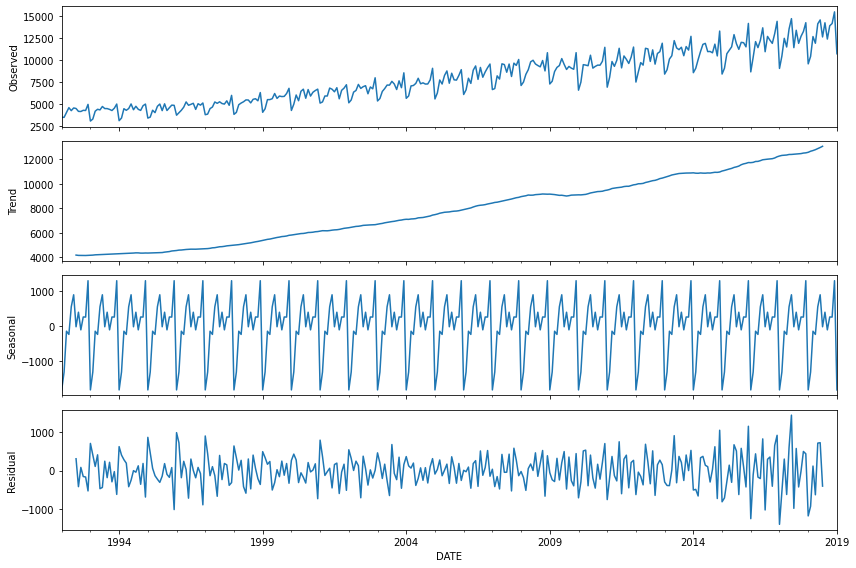

In [17]:
plt.rcParams['figure.figsize'] = 12, 8
seasonal_decompose(df['Sales']).plot();

Train Test Split

In [19]:
nobs = 12
train = df[:-12]
test = df[-12:]

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler = MinMaxScaler().fit(train)
train_scaled = scaler.transform(train) 
test_scaled = scaler.transform(test)

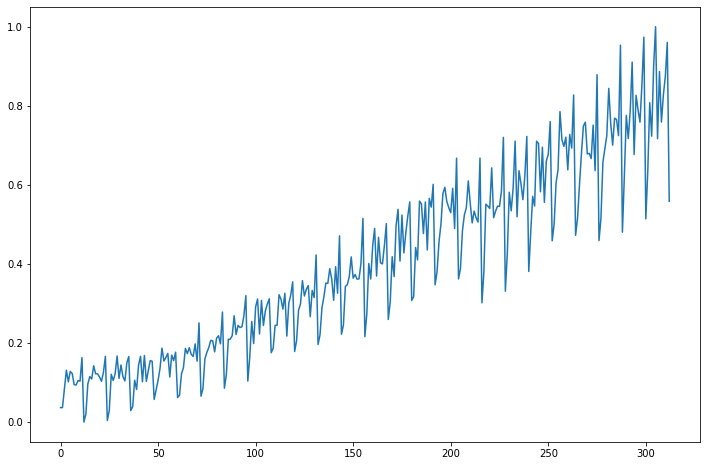

In [32]:
plt.plot(train_scaled)

Formating the dataset to feed into neural network

In [57]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [65]:
n_input = 12
n_features = 1
train_generator = TimeseriesGenerator(train_scaled,train_scaled,length=n_input,batch_size=1)

In [66]:
train_scaled[:4]

array([[0.03658432],
       [0.03649885],
       [0.08299855],
       [0.13103684]])

In [67]:
X,y = train_generator[0]

In [68]:
X

array([[[0.03658432],
        [0.03649885],
        [0.08299855],
        [0.13103684],
        [0.1017181 ],
        [0.12804513],
        [0.12266006],
        [0.09453799],
        [0.09359774],
        [0.10496624],
        [0.10334217],
        [0.16283443]]])

In [69]:
y

array([[0.]])

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [71]:
model = Sequential()
model.add(LSTM(150,input_shape=(n_input,n_features),activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [72]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


In [73]:
model.fit_generator(train_generator,epochs=25)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/25
301/301 [==============================] - 2s 7ms/step - loss: 0.0190
Epoch 2/25
301/301 [==============================] - 2s 7ms/step - loss: 0.0099
Epoch 3/25
301/301 [==============================] - 2s 7ms/step - loss: 0.0087
Epoch 4/25
301/301 [==============================] - 2s 7ms/step - loss: 0.0078
Epoch 5/25
301/301 [==============================] - 2s 7ms/step - loss: 0.0071
Epoch 6/25
301/301 [==============================] - 2s 7ms/step - loss: 0.0055
Epoch 7/25
301/301 [==============================] - 2s 7ms/step - loss: 0.0046
Epoch 8/25
301/301 [==============================] - 2s 7ms/step - loss: 0.0037
Epoch 9/25
301/301 [==============================] - 2s 7ms/step - loss: 0.0025
Epoch 10/25
301/301 [==============================] - 2s 7ms/step - loss: 0.0025
Epoch 11/25
301/301 [==============================] - 2s 7ms/step - loss: 0.0020
Epoch 12/25
301/301 [==========

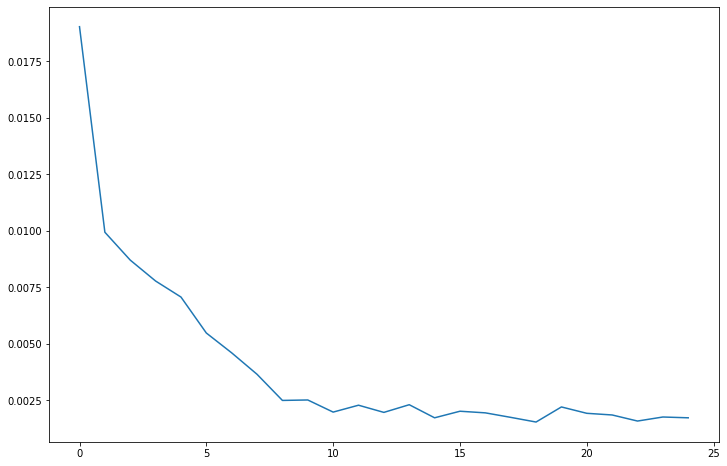

In [76]:
plt.plot(model.history.history['loss'])

In [77]:
#12 history steps to predict 13

In [79]:
first_eval_batch = train_scaled[-12:].reshape((1,n_input,n_features))

In [80]:
model.predict(first_eval_batch)

array([[0.67938304]], dtype=float32)

Forecast using RNN

In [81]:
test_predictions = []
first_eval_batch = train_scaled[-n_input:]
current_batch = first_eval_batch.reshape((1,n_input,n_features))


for i in range(len(test)):
  current_pred = model.predict(current_batch)[0]
  test_predictions.append(current_pred)
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [97]:
true_predictions = scaler.inverse_transform(test_predictions)

In [108]:
test['Predictions'] = true_predictions

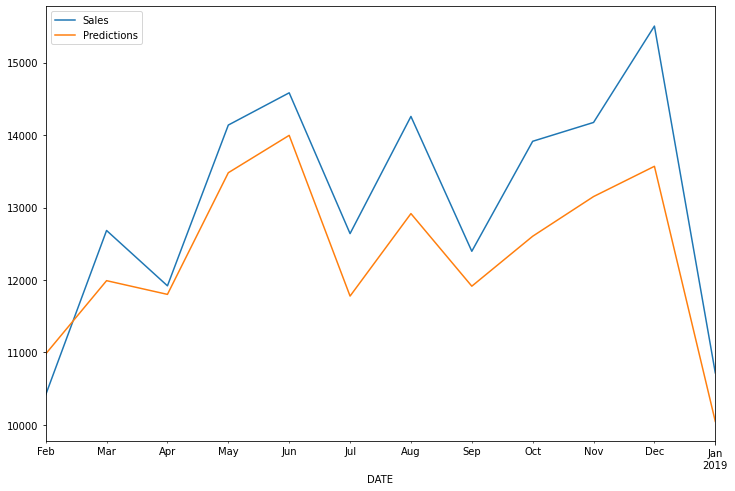

In [109]:
test.plot()

In [102]:
model.save('myModel.h5')

In [103]:
from tensorflow.keras.models import load_model

In [104]:
new_model = load_model('myModel.h5')

In [105]:
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________
